#1

In [86]:
import cv2
import numpy as np

# Load the images
image1 = cv2.imread("florence1.jpg")
image2 = cv2.imread("florence2.jpg")

# Initialize variables for points
points1 = []

# Define the callback function for mouse events
def draw_point(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # Append the selected point to the respective list
        points1.append([x, y])
        # Display the selected point on the image
        cv2.circle(image1, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow("Image 1", image1)

# Create a window and set the callback function
cv2.namedWindow("Image 1")
cv2.setMouseCallback("Image 1", draw_point)

# Display the image until 5 points are selected
while len(points1) < 5:
    cv2.imshow("Image 1", image1)
    cv2.waitKey(1)

cv2.destroyAllWindows()

# Print the selected points for verification
print("Selected points for Image 1:", points1)
# Load the image2
image2 = cv2.imread("florence2.jpg")

# Initialize variables for points2
points2 = []

# Define the callback function for mouse events on image2
def draw_point_image2(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        # Append the selected point to the respective list
        points2.append([x, y])
        # Display the selected point on the image
        cv2.circle(image2, (x, y), 5, (0, 255, 0), -1)
        cv2.imshow("Image 2", image2)

# Create a window and set the callback function for image2
cv2.namedWindow("Image 2")
cv2.setMouseCallback("Image 2", draw_point_image2)

# Display the image2 until 5 points are selected
while len(points2) < 5:
    cv2.imshow("Image 2", image2)
    cv2.waitKey(1)

cv2.destroyAllWindows()

# Print the selected points for verification
print("Selected points for Image 2:", points2)


Selected points for Image 1: [[623, 226], [1357, 529], [628, 532], [1411, 795], [895, 130]]
Selected points for Image 2: [[495, 728], [1237, 535], [478, 981], [1267, 814], [1239, 161]]


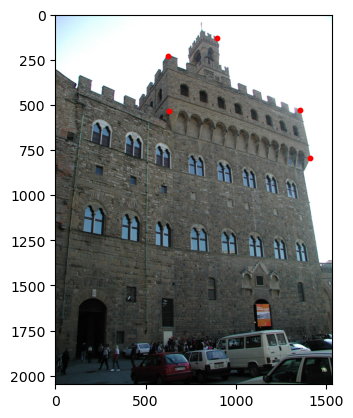

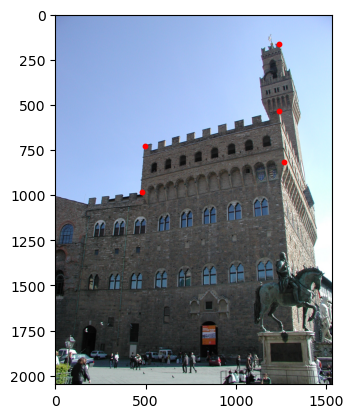

In [87]:
#Image 1
plt.imshow(cv2.cvtColor(image1, cv2.COLOR_BGR2RGB))

#selected 5 points in image1
selected_points_im1 = points1

#Representation of points
for point in selected_points_im1:
    plt.scatter(*point, color='red', marker='o', s=10)

#Show image1
plt.show()

#Image 2
plt.imshow(cv2.cvtColor(image2, cv2.COLOR_BGR2RGB))

#selected 5 points in image2
selected_points_im2 = points2

#Representation of points
for point in selected_points_im2:
    plt.scatter(*point, color='red', marker='o',s=10)

#Show image2
plt.show()

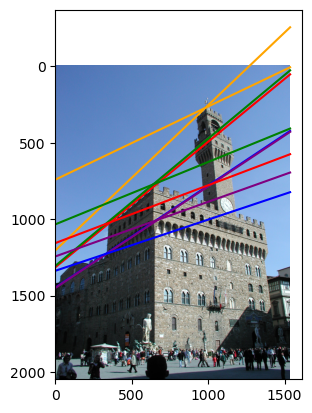

In [88]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Assuming image3 is a horizontally stacked composite of image1 and image2
image3 = Image.open("florence3.jpg")
image3_array = np.array(image3)
#Generate Fundamental Matrices
F13 = np.array([
    [6.04444985855117e-08, 2.56726410274219e-07, -0.000602529673152695],
    [2.45555247713476e-07, -8.38811736871429e-08, -0.000750892330636890],
    [-0.000444464396704832, 0.000390321707113558, 0.999999361609429]
])


F23 = np.array([
    [3.03994528999160e-08, 2.65672654114295e-07, -0.000870550254997210],
    [4.67606901933558e-08, -1.11709498607089e-07, -0.00169128012255720],
    [-1.38310618285550e-06, 0.00140690091935593, 0.999997201170569]
])


# Defined a colors list to represente lines

colors = ['red', 'green', 'blue', 'purple', 'orange']

# Show image3
plt.imshow(image3)

# Use for loop for image 1
for i, point in enumerate(selected_points_im1):
    point_homogeneous = np.array([point[0], point[1], 1])
    F_point13 = np.dot(F13, point_homogeneous)
    m = np.sqrt(F_point13[0]**2 + F_point13[1]**2 + F_point13[2]**2)

    # Generating normalize matrix for F13
    normalize_matrix = np.array([
        [F_point13[0] / m],
        [F_point13[1] / m],
        [F_point13[2] / m]
    ])
    
    # Constant values
    a = normalize_matrix[0][0]
    b = normalize_matrix[1][0]
    c = normalize_matrix[2][0]

    # Determination of x values
    x_values = np.linspace(0, image3_array.shape[1], 100)

    # Using ax + by + c = 0 equation calculate y values 
    y_values = (-a * x_values - c) / b

    # Draw epipolar lines in different colors
    plt.plot(x_values, y_values, color=colors[i])

# Use for loop for image 2
for i, point in enumerate(selected_points_im2):
    point_homogeneous = np.array([point[0], point[1], 1])
    F_point23 = np.dot(F23, point_homogeneous)
    m = np.sqrt(F_point23[0]**2 + F_point23[1]**2 + F_point23[2]**2)

    # Generating normalize matrix for F23
    normalize_matrix = np.array([
        [F_point23[0] / m],
        [F_point23[1] / m],
        [F_point23[2] / m]
    ])
    
    # Constant values
    a = normalize_matrix[0][0]
    b = normalize_matrix[1][0]
    c = normalize_matrix[2][0]

    # Determination of x values
    x_values = np.linspace(0, image3_array.shape[1], 100)

    # Using ax + by + c = 0 equation calculate y values 
    y_values = (-a * x_values - c) / b

    # Draw epipolar lines in different colors
    plt.plot(x_values, y_values, color=colors[i])

# Show the result
plt.show()